Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap 
#from pandas_profiling import ProfileReport

## Step-1: Initial Data Exploration

In [2]:
df = pd.read_csv('Supermarket_sales.csv')

In [3]:
#See first 8 raws

df.head(8) 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/19,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2/25/19,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2/24/19,11:38,Ewallet,735.60,4.761905,36.7800,8.0


In [4]:
#Last 3 raws

df.tail(3) 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [5]:
#Display the all coulmn names in the dataset

df.columns 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
df['Date']

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

Note: Data type of dates are object, however, it should have been date time. We can convert it as;

In [8]:
 #Change data type from object to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

- Setting the date column as the index for the data frame;

In [10]:
 #inplace=True is used in order to make permanent changes

df.set_index ('Date', inplace=True)

In [11]:
df.head() 
#The dates will be in the index column;

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
 #Show statistics of numeric columns
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Step-2: Univariate Analysis 
(We will look at one variable at a time)

**Question:** What does the distribution of customer ratings look like?

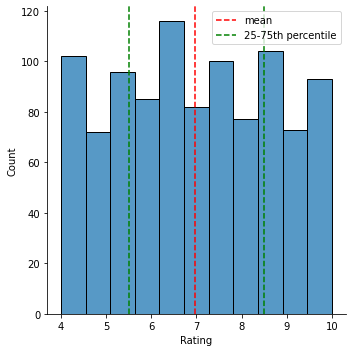

In [45]:
sns.displot(df['Rating']) #seaborn library is used

#Display mean rating
#'vline' means vertical line; 'c' means color; 'ls' for line style
#we use numpy to calculate mean 
#x is mean
plt.axvline(x = np.mean(df['Rating']), c= 'red', ls='--', label='mean') 
 


#let's see 25th and 75th percentile

plt.axvline(x = np.percentile(df['Rating'],25), c= 'green', ls='--', label='25-75th percentile')
plt.axvline(x = np.percentile(df['Rating'],75), c= 'green', ls='--')

#to see labels on the graph
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

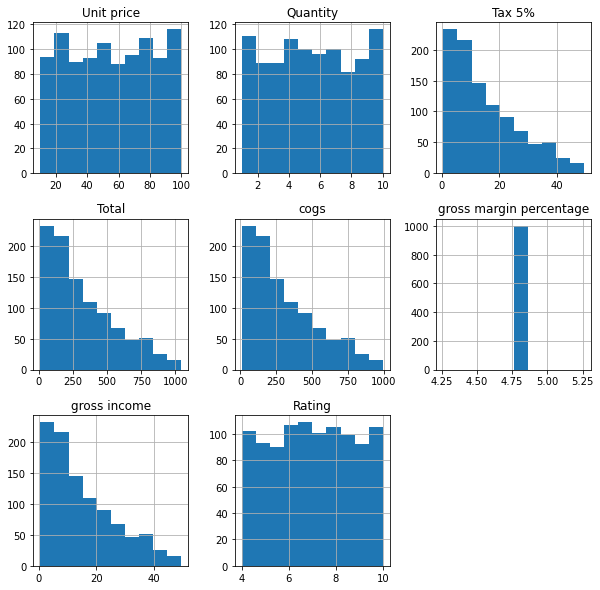

In [14]:
#For seeing graphs of all numerical values

df.hist(figsize=(10,10))

**Question:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

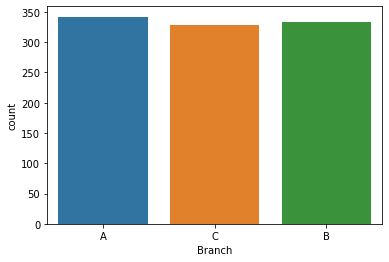

In [15]:
#Use countplot from seaborn
#Each row in the dataset represents each sale

sns.countplot(x = df['Branch'])

In [16]:
#The exact numbers of sales

df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

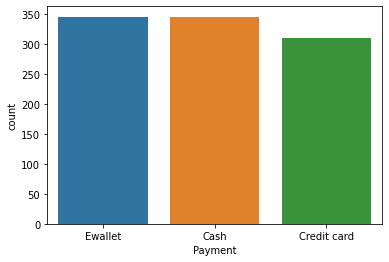

In [17]:
#We can use countplot for any categorical variables

sns.countplot(x = df['Payment'])

## Step-3: Bivariate Analysis

**Question:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

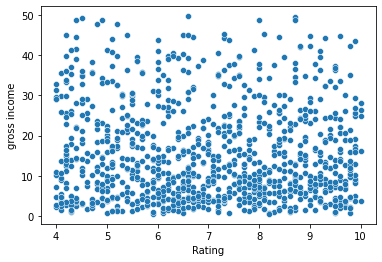

In [18]:
sns.scatterplot(x = df['Rating'], y = df['gross income'])

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

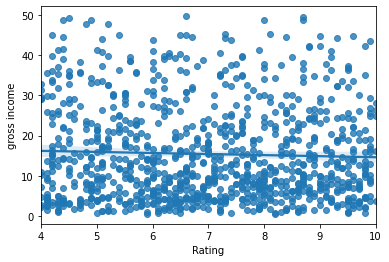

In [19]:
#Let's draw a regression plot to see the trend line

sns.regplot(x = df['Rating'], y = df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

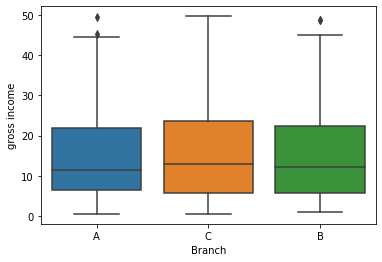

In [20]:
#to see if there is a relationship between branch and gross income

sns.boxplot(x = df['Branch'], y = df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

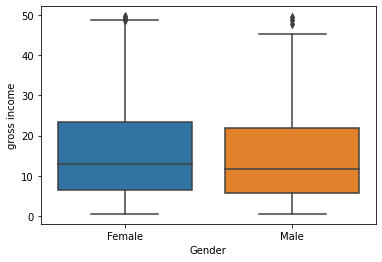

In [21]:
#to see if there is a relationship between gender and gross income

sns.boxplot(x = df['Gender'], y = df['gross income'])

In [22]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


We need to aggragete the data somehow because the dates can be repeated (different customers may come same day).
We can use "groupby" function in pandas for this purpose;

In [23]:
#Grouping according to the dates, grouping by the mean
#Each date row will be unique, represents the average value for the particular day

df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [24]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross income'>

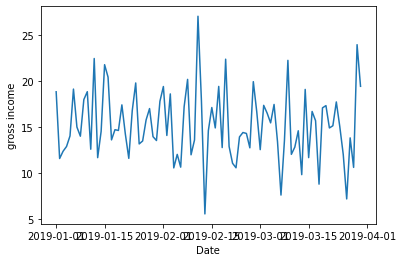

In [25]:
#x variables are the dates
#y variables are associated gross income with those dates

sns.lineplot(x = df.groupby(df.index).mean().index,
            y = df.groupby(df.index).mean()['gross income'])

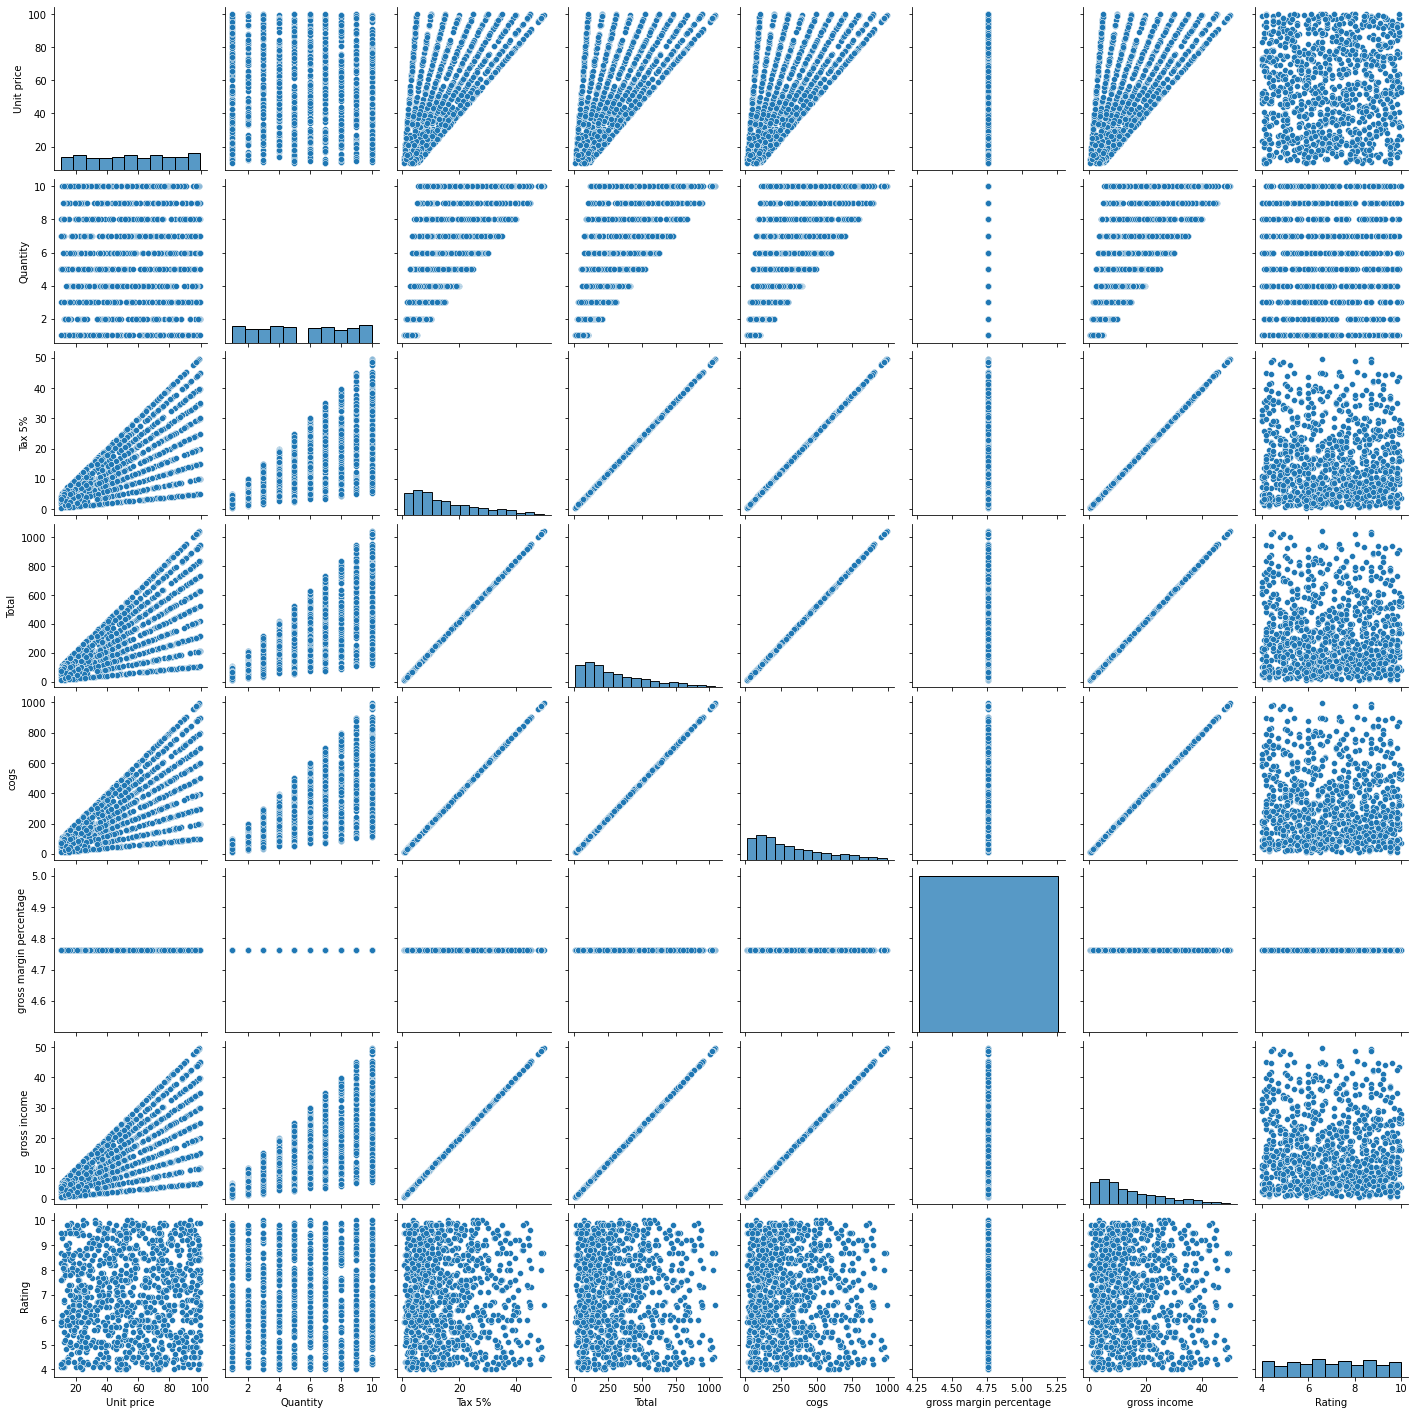

In [26]:
#if we want to plot all the bivariate relationship possible, we can use seaborn 'pairplot' function
#Pairplot is NOT useful for large dataset
#You will see univeraite and pairwise distribution

sns.pairplot(df)

## Step-4: Dealing with duplicate rows and missing values

In [27]:
#Display the duplicated values

df.duplicated()

#If there is a duplicated value, we will see True; if the value is not duplicated then we will see False

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [28]:
df.duplicated().sum()

#The output will tell us how many rows are duplicated. We have 3 in our dataset

3

In [29]:
#to see the duplicated values

df[df.duplicated() == True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [30]:
#to remove duplicated rows,

df.drop_duplicates(inplace=True)

#And we made it permanent with inplace=True

In [31]:
#to see missing values;

df.isna().sum()

#For example, customer type has 79 missing value

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:ylabel='Date'>

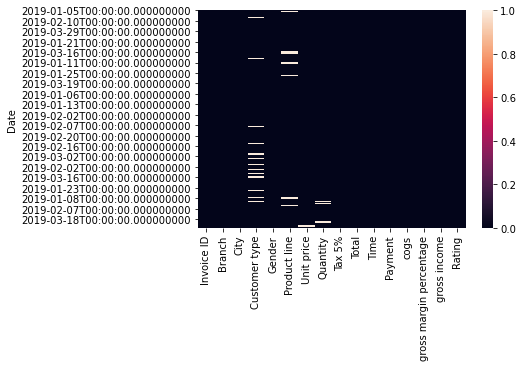

In [32]:
#We can see it with seaborn heatmap, as well

sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Date'>

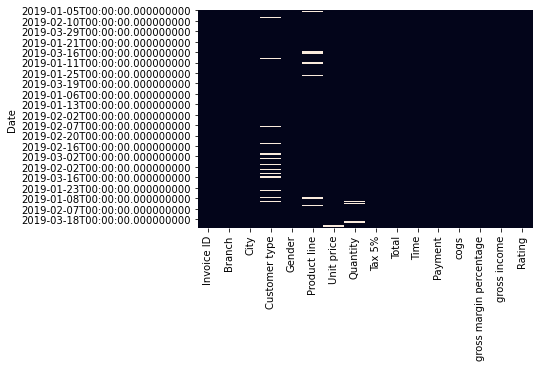

In [33]:
#White lines are missing values
#We can delete/not display cbar

sns.heatmap(df.isnull(),cbar=False)

### Here we will learn how to deal with missing values;

In [49]:
#One way is filling the missing values with mean value;
df.fillna(df.mean(), inplace=True)

#df.fillna(df.mode().iloc[0], inplace=True) # iloc() function enables us to select a particular cell of the dataset

#or we can fill them with 0
#df.fillna(0)

<AxesSubplot:ylabel='Date'>

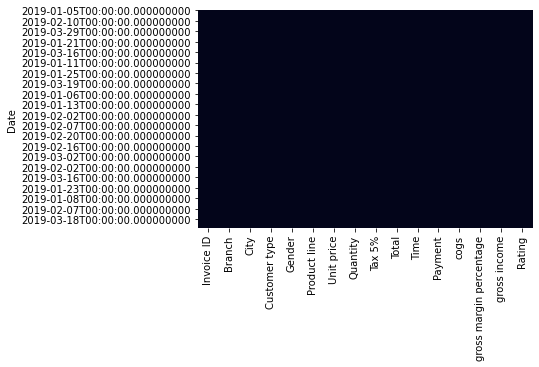

In [50]:
sns.heatmap(df.isnull(),cbar=False)

In [52]:
# dataset = pd.read_csv('Supermarket_sales.csv')
# prof = ProfileReport(dataset)
# prof

## Step-5: Correlation Analysis

In [55]:
#to see the correlation between 2 coulmns, np.corrcoef is used
#here we want to see the correlation between gross income and rating

np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [56]:
#We had a negative value from the previous cell (-0.036)
#If we want to get that specific number, we need to subset it

round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

In [60]:
#to see all correlation matrix; it means we find the correlation of each column in a data frame

df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.014786,0.629034,0.629034,0.629034,NaN,0.629034,-0.006601
Quantity,0.014786,1.000000,0.704067,0.704067,0.704067,NaN,0.704067,-0.021225
Tax 5%,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.629034,0.704067,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.006601,-0.021225,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [59]:
#We can round the numbers to 2 decimals

np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<AxesSubplot:>

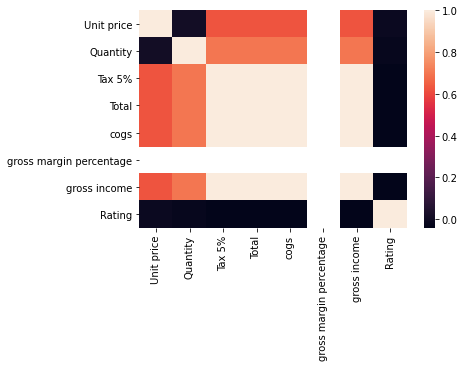

In [42]:
#in order to see the previous table visually, we can use heatmap

sns.heatmap(np.round(df.corr(),2))

<AxesSubplot:>

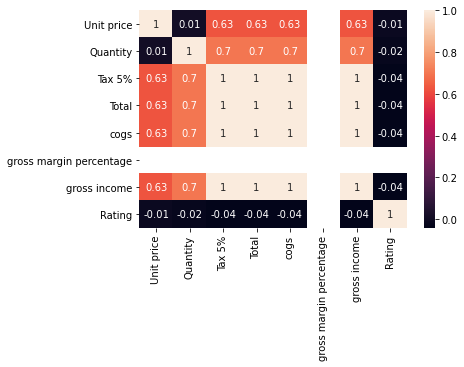

In [43]:
#to see specific correlation values on heatmap we use annot(ation)=True

sns.heatmap(np.round(df.corr(),2), annot=True)